In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [55]:
df=pd.read_excel('sea_levels_Predict2025.xlsx')
df.head()

,Time,Global Mean Sea Level
0,1880-01-15,-183.0
1,1880-02-15,-171.1
2,1880-03-15,-164.3
3,1880-04-15,-158.2
4,1880-05-15,-158.7


In [56]:
df.columns

Index(['Time', 'Global Mean Sea Level'], dtype='object')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Time                   1000 non-null   object 
 1   Global Mean Sea Level  1000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [58]:
def year(y):
    try:
        return y.year
    except:
        return int(y.split('-')[0])

In [59]:
df['Year']=df['Time'].apply(year)

In [60]:
df.corr()

,Global Mean Sea Level,Year
Global Mean Sea Level,1.000000,0.963877
Year,0.963877,1.000000


<AxesSubplot:xlabel='Year', ylabel='Global Mean Sea Level'>

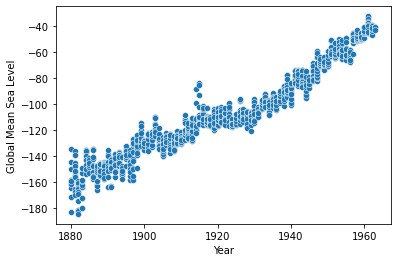

In [61]:
sns.scatterplot(data=df,x='Year',y='Global Mean Sea Level')

In [62]:
df.drop('Time',axis=1,inplace=True)

In [63]:
x=df['Year']
y=df['Global Mean Sea Level']

In [64]:
x=np.array(x).reshape(-1,1)

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=7)

In [66]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [67]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [68]:
print('Mean Squared Error = ',mean_squared_error(y_train,y_train_pred))
print('Root Mean Squared Error = ',mean_squared_error(y_train,y_train_pred,squared=False))
print("r2 train is " ,r2_score(y_train , y_train_pred) )
print("r2 test is " ,r2_score(y_test , y_test_pred) )

Mean Squared Error =  77.76656336559027
Roor Mean Squared Error =  8.818535216553272
r2 train is  0.9278116341182405
r2 test is  0.9336693737154622
